<a href="https://colab.research.google.com/github/vincent4u/CE807_Text_Analytics/blob/main/week3/lab03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The implementation of KMeans in scikit-learn
The main aspects of the implementation of KMeans in scikit-learn are:
- the function KMeans, which takes as input a number of clusters and an
initialization of the centroids and returns an object of type KMeans;
- the function fit, which takes as input a set of feature vectors and outputs
clusters;
- the function predict, which specifies the cluster each element belongs
to.

**Your Turn: study the documentation for KMeans at:
http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html**

## A toy example

The goal is to take a toy example and view the cluster change, using KMeans.

We will use random 2D data and perform the clustering.

The code assumes that you have the data in your GDrive.
Let's say that path in './CE807-SP-2024/Lab03/data/', pay close attention to the path

In [1]:
import os
import random
import scipy as sp
from scipy.stats import norm
from matplotlib import pylab
from sklearn.cluster import KMeans

Let's set the seed.

Pay close attention to the seeds, you will use your student_id as seed in the assignments.

In [2]:
seed = 3
random.seed(seed)  # to reproduce the data later on

num_clusters = 3

Function to plot 2D cluster

In [3]:
def plot_clustering(x, y, title, mx=None, ymax=None, xmin=None, km=None):
    pylab.figure(num=None, figsize=(8, 6))
    if km:
        pylab.scatter(x, y, s=50, c=km.predict(list(zip(x, y))))
    else:
        pylab.scatter(x, y, s=50)

    pylab.title(title)
    pylab.xlabel("Occurrence word 1")
    pylab.ylabel("Occurrence word 2")

    pylab.autoscale(tight=True)
    pylab.ylim(ymin=0, ymax=1)
    pylab.xlim(xmin=0, xmax=1)
    pylab.grid(True, linestyle='-', color='0.75')

    return pylab

Now, let's take some random 2D data

In [4]:
xw1 = norm(loc=0.3, scale=.15).rvs(20)
yw1 = norm(loc=0.3, scale=.15).rvs(20)

xw2 = norm(loc=0.7, scale=.15).rvs(20)
yw2 = norm(loc=0.7, scale=.15).rvs(20)

xw3 = norm(loc=0.2, scale=.15).rvs(20)
yw3 = norm(loc=0.8, scale=.15).rvs(20)

x = sp.append(sp.append(xw1, xw2), xw3)
y = sp.append(sp.append(yw1, yw2), yw3)
x
y

<ipython-input-4-33e935d3a7d0>:10: DeprecationWarning: scipy.append is deprecated and will be removed in SciPy 2.0.0, use numpy.append instead
  x = sp.append(sp.append(xw1, xw2), xw3)
<ipython-input-4-33e935d3a7d0>:11: DeprecationWarning: scipy.append is deprecated and will be removed in SciPy 2.0.0, use numpy.append instead
  y = sp.append(sp.append(yw1, yw2), yw3)


array([0.28914061, 0.33517585, 0.22770179, 0.42119497, 0.2940709 ,
       0.20826352, 0.24983959, 0.21699892, 0.2789141 , 0.35402548,
       0.28827031, 0.69189744, 0.28099025, 0.69049881, 0.22291239,
       0.24300009, 0.3601459 , 0.60320506, 0.14838637, 0.1021741 ,
       0.62107534, 0.66615728, 0.60863323, 0.64700099, 0.89239001,
       0.65986566, 0.74959251, 0.70286565, 0.73089203, 1.14910647,
       0.52520599, 0.69145445, 0.67185178, 0.39080464, 0.78490905,
       0.90813702, 0.62234196, 0.66685673, 0.91946393, 0.66373679,
       1.24695343, 0.95193772, 0.79275261, 0.68058932, 0.99870409,
       0.70698673, 0.83001741, 0.86620819, 0.55117993, 0.74532488,
       0.63414063, 0.73607455, 0.6058954 , 1.01011666, 0.59375561,
       0.71169627, 0.77191579, 0.44877525, 0.99781135, 0.69110371])

Plot the data

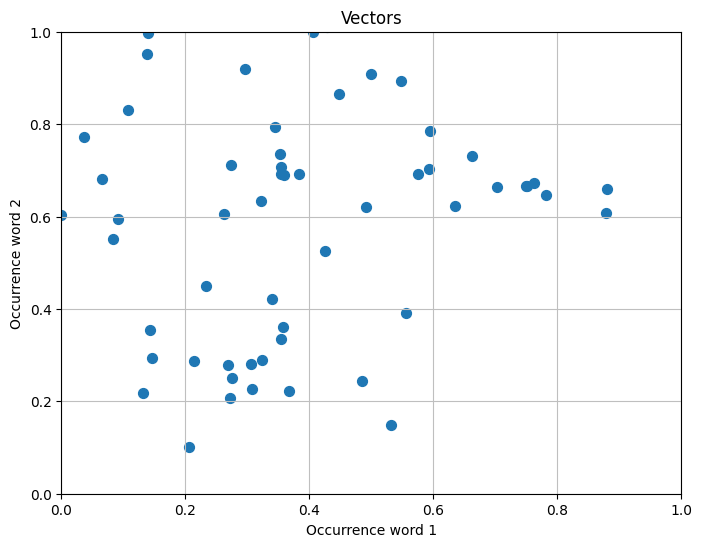

In [5]:
i = 1
plot_clustering(x, y, "Vectors")
pylab.show()
pylab.clf()
pylab.close()

Let's do the one interation of clustering, using KMeans

<ipython-input-22-74f9deec3368>:5: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  mx, my = sp.meshgrid(sp.arange(0, 1, 0.001), sp.arange(0, 1, 0.001))
<ipython-input-22-74f9deec3368>:5: DeprecationWarning: scipy.meshgrid is deprecated and will be removed in SciPy 2.0.0, use numpy.meshgrid instead
  mx, my = sp.meshgrid(sp.arange(0, 1, 0.001), sp.arange(0, 1, 0.001))
<ipython-input-22-74f9deec3368>:10: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  km.fit(sp.array(list(zip(x, y))))


Initialization complete
Iteration 0, inertia 6.82595139831168.


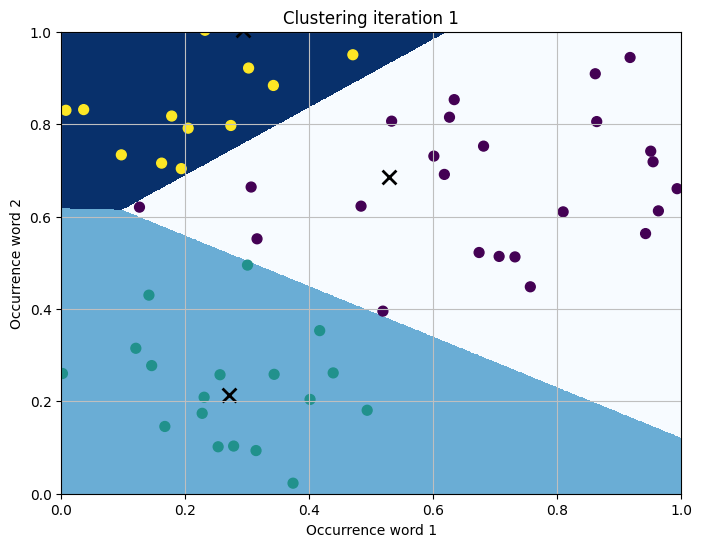

<Figure size 640x480 with 0 Axes>

In [ ]:
i += 1

# 1 iteration ####################

mx, my = sp.meshgrid(sp.arange(0, 1, 0.001), sp.arange(0, 1, 0.001))

km = KMeans(init='random', n_clusters=num_clusters, verbose=1,
            n_init=1, max_iter=1,
            random_state=seed)
km.fit(sp.array(list(zip(x, y))))

Z = km.predict(sp.c_[mx.ravel(), my.ravel()]).reshape(mx.shape)

plot_clustering(x, y, "Clustering iteration 1", km=km)
pylab.imshow(Z, interpolation='nearest',
             extent=(mx.min(), mx.max(), my.min(), my.max()),
             cmap=pylab.cm.Blues,
             aspect='auto', origin='lower')

c1a, c1b, c1c = km.cluster_centers_
pylab.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
              marker='x', linewidth=2, s=100, color='black')
pylab.show()
pylab.clf()

Now, Let's do the two interation of clustering, using KMeans

<ipython-input-26-856f8e488200>:9: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  km.fit(sp.array(list(zip(x, y))))


Initialization complete
Iteration 0, inertia 6.82595139831168.
Iteration 1, inertia 4.186729829377697.


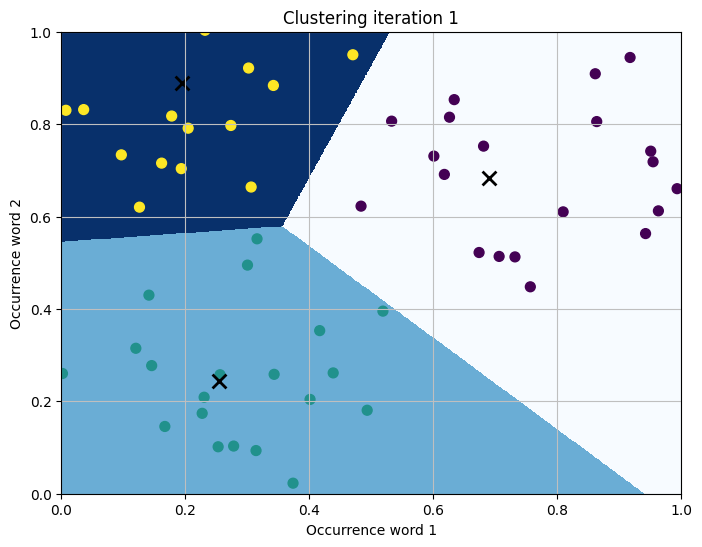

<Figure size 640x480 with 0 Axes>

In [ ]:
i += 1

# 2 iterations ####################


km = KMeans(init='random', n_clusters=num_clusters, verbose=1,
            n_init=1, max_iter=2,
            random_state=seed)
km.fit(sp.array(list(zip(x, y))))

Z = km.predict(sp.c_[mx.ravel(), my.ravel()]).reshape(mx.shape)

plot_clustering(x, y, "Clustering iteration 1", km=km)
pylab.imshow(Z, interpolation='nearest',
             extent=(mx.min(), mx.max(), my.min(), my.max()),
             cmap=pylab.cm.Blues,
             aspect='auto', origin='lower')

c1a, c1b, c1c = km.cluster_centers_
pylab.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
              marker='x', linewidth=2, s=100, color='black')
pylab.show()
pylab.clf()

**Your turn: play with by chaning different parameters for multiple iteration and observe the changes. Observe, how change in `seed` affects initialization. What do you observe when use use same/different seeds.**

## Clustering 20Newsgroups using KMeans

In the first lab we saw 20Newgroup dataset. The dataset is a collection of around 20,000 documents
from 20 different newsgroups, that is commonly used in experiments on text
classification and text clustering. The dataset can be found at:
http://qwone.com/~jason/20Newsgroups. And also look at the sklearn's documentation https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html

In [ ]:
import sklearn.datasets
import scipy as sp

Let's get the dataset

In [ ]:
all_data = sklearn.datasets.fetch_20newsgroups(subset="all")

In [ ]:
print("Number of total posts: %i" % len(all_data.filenames))

Number of total posts: 18846


For sake of simplicity, we will work with 6 diverse categories.

**Your turn: Check all possible categories in the dataset**

In [ ]:
groups = [
    'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware',
    'comp.sys.mac.hardware', 'comp.windows.x', 'sci.space']
train_data = sklearn.datasets.fetch_20newsgroups(subset="train",
                                                 categories=groups)
print("Number of training posts in tech groups:", len(train_data.filenames))

Number of training posts in tech groups: 3529


In [ ]:
labels = train_data.target
num_clusters = 50

Remember the pipeline, first you have to convert text into vector representation before Clustering.

Here, we are using TF-IDF based representaion with stemming.

In [ ]:
import nltk.stem
english_stemmer = nltk.stem.SnowballStemmer('english')

from sklearn.feature_extraction.text import TfidfVectorizer

Observe, how TF-IDF and stemming is combined together in a Class.

In [ ]:
class StemmedTfidfVectorizer(TfidfVectorizer):

    def build_analyzer(self):
        analyzer = super(TfidfVectorizer, self).build_analyzer()
        return lambda doc: (english_stemmer.stem(w) for w in analyzer(doc))

vectorizer = StemmedTfidfVectorizer(min_df=10, max_df=0.5,
                                    stop_words='english', decode_error='ignore'
                                    )

In [ ]:
vectorized = vectorizer.fit_transform(train_data.data)
num_samples, num_features = vectorized.shape
print("#samples: %d, #features: %d" % (num_samples, num_features))
# samples: 3529, #features: 4712

#samples: 3529, #features: 4712


In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=num_clusters, n_init=1, verbose=1, random_state=3)
clustered = km.fit(vectorized)


Initialization complete
Iteration 0, inertia 5686.0525436637.
Iteration 1, inertia 3164.8875140123528.
Iteration 2, inertia 3132.2077111951467.
Iteration 3, inertia 3111.712575878138.
Iteration 4, inertia 3098.583773647865.
Iteration 5, inertia 3092.1905280374385.
Iteration 6, inertia 3087.2770892443127.
Iteration 7, inertia 3084.1004773772715.
Iteration 8, inertia 3082.7997677507046.
Iteration 9, inertia 3082.234382617422.
Iteration 10, inertia 3081.9487984162006.
Iteration 11, inertia 3081.843333964575.
Iteration 12, inertia 3081.790665037127.
Iteration 13, inertia 3081.752217763826.
Iteration 14, inertia 3081.659718679884.
Iteration 15, inertia 3081.616791469508.
Iteration 16, inertia 3081.5894842981634.
Iteration 17, inertia 3081.57097030357.
Converged at iteration 17: strict convergence.


In [ ]:
print("km.labels_=%s" % km.labels_)

km.labels_=[48 23 31 ...  6  2 22]


Now, let's test this on a new data

In [ ]:
new_post = \
    """Disk drive problems. Hi, I have a problem with my hard disk.
After 1 year it is working only sporadically now.
I tried to format it, but now it doesn't boot any more.
Any ideas? Thanks.
"""

Remember, first you have to convert text to vector using the same vectorizer

In [ ]:
new_post_vec = vectorizer.transform([new_post])
new_post_vec.shape

(1, 4712)

Now, test the model

In [ ]:
new_post_label = km.predict(new_post_vec)[0]

new_post_label

9

**Your Turn: Play with diffent examples and build a mental picture of the clusters**

We can now find the most similar posts, and print the top 3

In [ ]:
similar_indices = (km.labels_ == new_post_label).nonzero()[0]

similar = []
for i in similar_indices:
    dist = sp.linalg.norm((new_post_vec - vectorized[i]).toarray())
    similar.append((dist, train_data.data[i]))

similar = sorted(similar)
print("Count similar: %i" % len(similar))

show_at_1 = similar[0]
show_at_2 = similar[int(len(similar) / 10)]
show_at_3 = similar[int(len(similar) / 2)]

print("=== #1 ===")
print(show_at_1)
print()

print("=== #2 ===")
print(show_at_2)
print()

print("=== #3 ===")
print(show_at_3)

Count similar: 56
=== #1 ===
(1.0378441731334074, "From: Thomas Dachsel <GERTHD@mvs.sas.com>\nSubject: BOOT PROBLEM with IDE controller\nNntp-Posting-Host: sdcmvs.mvs.sas.com\nOrganization: SAS Institute Inc.\nLines: 25\n\nHi,\nI've got a Multi I/O card (IDE controller + serial/parallel\ninterface) and two floppy drives (5 1/4, 3 1/2) and a\nQuantum ProDrive 80AT connected to it.\nI was able to format the hard disk, but I could not boot from\nit. I can boot from drive A: (which disk drive does not matter)\nbut if I remove the disk from drive A and press the reset switch,\nthe LED of drive A: continues to glow, and the hard disk is\nnot accessed at all.\nI guess this must be a problem of either the Multi I/o card\nor floppy disk drive settings (jumper configuration?)\nDoes someone have any hint what could be the reason for it.\nPlease reply by email to GERTHD@MVS.SAS.COM\nThanks,\nThomas\n+-------------------------------------------------------------------+\n| Thomas Dachsel            

**Your Turn**


*   different versions of the kmeans algorithm
*   using different numbers of features
*   using idf or not
*   using different feature like BoW or word2vec based
*   save required files like vectorizer, model etc into GDrive



**How to deal with Noise**: You will find that the clustering is not perfect: some posts will be clustered with posts to a different newsgroup.

For examples

In [ ]:
# Create a list of tuples that can be sorted by the length of the post

post_group = zip(train_data.data, train_data.target)
all = [(len(post[0]), post[0], train_data.target_names[post[1]])
       for post in post_group]

In [ ]:
graphics = sorted([post for post in all if post[2] == 'comp.graphics'])
print(graphics[5])

(245, 'From: SITUNAYA@IBM3090.BHAM.AC.UK\nSubject: test....(sorry)\nOrganization: The University of Birmingham, United Kingdom\nLines: 1\nNNTP-Posting-Host: ibm3090.bham.ac.uk\n\n==============================================================================\n', 'comp.graphics')


In [ ]:
noise_post = graphics[5][1]
noise_post

'From: SITUNAYA@IBM3090.BHAM.AC.UK\nSubject: test....(sorry)\nOrganization: The University of Birmingham, United Kingdom\nLines: 1\nNNTP-Posting-Host: ibm3090.bham.ac.uk\n\n==============================================================================\n'

In [ ]:
analyzer = vectorizer.build_analyzer()
print(list(analyzer(noise_post)))

['situnaya', 'ibm3090', 'bham', 'ac', 'uk', 'subject', 'test', 'sorri', 'organ', 'univers', 'birmingham', 'unit', 'kingdom', 'line', 'nntp', 'post', 'host', 'ibm3090', 'bham', 'ac', 'uk']


In [ ]:
useful = set(analyzer(noise_post)).intersection(vectorizer.get_feature_names_out())
print(sorted(useful))

['ac', 'birmingham', 'host', 'kingdom', 'nntp', 'sorri', 'test', 'uk', 'unit', 'univers']


In [ ]:
for term in sorted(useful):
    print('IDF(%s)=%.2f' % (term,
                            vectorizer._tfidf.idf_[vectorizer.vocabulary_[term]]))

IDF(ac)=3.51
IDF(birmingham)=6.77
IDF(host)=1.74
IDF(kingdom)=6.68
IDF(nntp)=1.77
IDF(sorri)=4.14
IDF(test)=3.83
IDF(uk)=3.70
IDF(unit)=4.42
IDF(univers)=1.91


**Your Turn: Try to find a way to deal with Noisy data**

## Hierarchical clustering

The `AgglomerativeClustering` scikit-learn object performs hierarchical
clustering 'bottom-up', starting from each object as a separate cluster, and then merging these clusters two at a time.

The class supports three different linkage criteria—metrics used to decide which clusters are closer:
- Maximum distance
- Average distance
- Ward distance: this is a criterion that minimizes the sum of square
differences.

In [ ]:
import time as time
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_swiss_roll

In [ ]:
# Generate data (swiss roll dataset)
n_samples = 1500
noise = 0.05
X, y = make_swiss_roll(n_samples=n_samples, noise=noise)
# Make it thinner
X[:, 1] *= .5

In [ ]:
# Compute clustering
print("Compute unstructured hierarchical clustering...")
st = time.time()
ward = AgglomerativeClustering(n_clusters=6, linkage='ward').fit(X)
elapsed_time = time.time() - st
label = ward.labels_
print("Elapsed time: %.2fs" % elapsed_time)
print("Number of points: %i" % label.size)

Compute unstructured hierarchical clustering...
Elapsed time: 0.13s
Number of points: 1500


<ipython-input-72-4ff466fbcaa7>:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  'o', color=plt.cm.jet(np.float(l) / np.max(label + 1)))


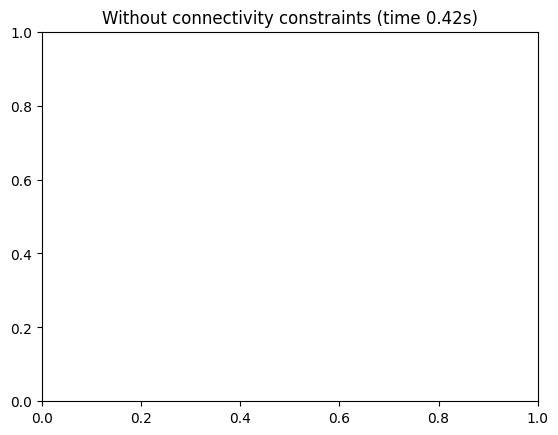

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot result
fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(7, -80)
for l in np.unique(label):
    ax.plot3D(X[label == l, 0], X[label == l, 1], X[label == l, 2],
              'o', color=plt.cm.jet(np.float(l) / np.max(label + 1)))
plt.title('Without connectivity constraints (time %.2fs)' % elapsed_time)
plt.show()
pylab.clf()

In [ ]:
# Define the structure A of the data. Here a 10 nearest neighbors
from sklearn.neighbors import kneighbors_graph
connectivity = kneighbors_graph(X, n_neighbors=10, include_self=False)

In [ ]:
# Compute clustering
print("Compute structured hierarchical clustering...")
st = time.time()
ward = AgglomerativeClustering(n_clusters=6, connectivity=connectivity,
                               linkage='ward').fit(X)
elapsed_time = time.time() - st
label = ward.labels_
print("Elapsed time: %.2fs" % elapsed_time)
print("Number of points: %i" % label.size)

Compute structured hierarchical clustering...
Elapsed time: 0.42s
Number of points: 1500


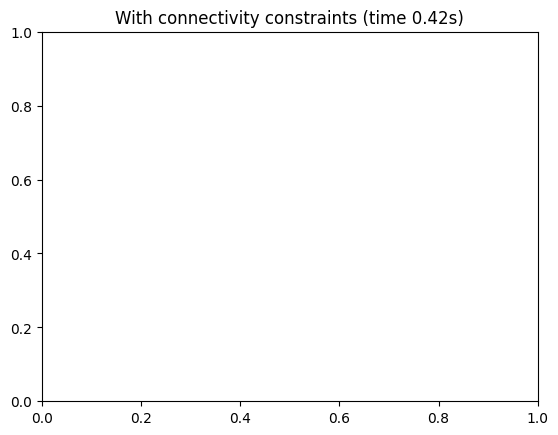

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot result
fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(7, -80)
for l in np.unique(label):
    ax.plot3D(X[label == l, 0], X[label == l, 1], X[label == l, 2],
              'o', color=plt.cm.jet(float(l) / np.max(label + 1)))
plt.title('With connectivity constraints (time %.2fs)' % elapsed_time)

plt.show()
pylab.clf()

**Your Turn: Above figures should be in 3D, you should find way to display figure in 3D and then analyse the difference in both**

## Data Exploration

This maybe part of you Assignment. Here, I will provide hint, not solution.

Let's first mount the GDrive and get the path

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive') # To mount the GDrive, this will ask permission for access

Mounted at /content/gdrive


In [ ]:
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = os.path.join('./CE807-SP-2024/Lab03/') # Make sure to update with your student_id and student_id is an integer
GOOGLE_DRIVE_PATH = os.path.join('gdrive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print('List files: ', os.listdir(GOOGLE_DRIVE_PATH))

List files:  ['lab03.ipynb', 'data']


In [ ]:
data_dir =  os.path.join(GOOGLE_DRIVE_PATH,'data')


In [ ]:
data_file =  os.path.join(GOOGLE_DRIVE_PATH,'train.csv')

**Your Turn**

*   Download file from https://drive.google.com/file/d/1xz1lI8aXMGZ1t96ZAX_PyJeQkyZBADb0/view?usp=sharing and save it in './CE807-SP-2024/Lab03/data/'
*  Read the csv file and perform different data exploration
*  you could also use different methods to analyse data, as in https://towardsdatascience.com/nlp-part-3-exploratory-data-analysis-of-text-data-1caa8ab3f79d
* Use clustering with different cluster size to analyse the data   

